# Задание 2
### Часть 1

Разберемся с миграцией Кирхгофа на простых примерах


Импортируем библиотеки. На сей раз нам понадобится библиотека segyio для работы с сейсмикой

In [1]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

#### 1.1. Импорт сейсмических данных в формате SEG-Y в Python

Так выглядит импорт SEG-Y файла

In [2]:
with segyio.open(r"./Seismic_data_000.sgy") as f:
    inline_list = f.ilines   # список инлайнов в файле
    seis_data = f.iline[1]   # Он там единственный - номер 1. Возьмем его и положим в переменную seis_data

    trace_header_11 = f.header[11] # так получать заголовки какой-либо трассы (для примера взяли 11-ю)
    bin_header = f.bin     # так получать бинарный заголовок файла
    x_coordinates = f.attributes(segyio.TraceField.GroupX)[:] # так получать координату X из всех трасс файла
    

Вот как выглядит заголовок 11-й трассы:

In [3]:
print (trace_header_11)

{TRACE_SEQUENCE_LINE: 12, TRACE_SEQUENCE_FILE: 12, FieldRecord: 1, TraceNumber: 12, EnergySourcePoint: 1, CDP: 12, CDP_TRACE: 12, TraceIdentificationCode: 1, NSummedTraces: 0, NStackedTraces: 0, DataUse: 1, offset: 0, ReceiverGroupElevation: 0, SourceSurfaceElevation: 0, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: -100, SourceGroupScalar: -100, SourceX: 5501, SourceY: 0, GroupX: 5501, GroupY: 0, CoordinateUnits: 1, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 0, LagTimeB: 0, DelayRecordingTime: 0, MuteTimeStart: 0, MuteTimeEND: 0, TRACE_SAMPLE_COUNT: 1001, TRACE_SAMPLE_INTERVAL: 1000, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 0, Correlated: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SweepType: 0, SweepTraceTaperLengthStart: 0, SweepTr

У каждой трассы есть такой набор параметров. Как видно, не все они имеют какой-либо смысл (скорее всего, в данной ситуации не нужны).
Нас в первую очередь интересует координата $x$ (поле `CDP_X`). Кстати, обратите внимание, что координаты источников и приемников (`SourceX`, `GroupX`) в 100 раз больше.
В sgy часто координаты умножают на 100, как, например, и в этом случае. Это вынужденная мера: значение заголовка может быть только целочисленным, а иногда округление до целых метров неприемлемо. Соответственно координаты умножают на 100 (т.е. измеряют в сантиметрах). Это отмечается в соответствующем заголовке (`SourceGroupScalar`). Отрицательное значение значит, что нужно деить координаты, положительное - что умножать.

In [4]:
print(x_coordinates)

[    1   501  1001  1501  2001  2501  3001  3501  4001  4501  5001  5501
  6001  6501  7001  7501  8001  8501  9001  9501 10001 10501 11001 11501
 12001 12501 13001 13501 14001 14501 15001 15501 16001 16501 17001 17501
 18001 18501 19001 19501 20001 20501 21001 21501 22001 22501 23001 23501
 24001 24501 25001 25501 26001 26501 27001 27501 28001 28501 29001 29501
 30001 30501 31001 31501 32001 32500 33000 33500 34000 34500 35000 35500
 36000 36500 37000 37500 38000 38500 39000 39500 40000 40500 41000 41500
 42000 42500 43000 43500 44000 44500 45000 45500 46000 46500 47000 47500
 48000 48500 49000 49500 50000 50500 51000 51500 52000 52500 53000 53500
 54000 54500 55000 55500 56000 56500 57000 57500 58000 58500 59000 59500
 60000 60500 61000 61500 62000 62500 63000 63500 64000 64500 65000 65500
 66000 66500 67000 67500 67999 68499 68999 69499 69999 70499 70999 71499
 71999 72499 72999 73499 73999 74499 74999 75499 75999 76499 76999 77499
 77999 78499 78999 79499 79999 80499 80999 81499 81

In [5]:
scaler = trace_header_11[segyio.TraceField.SourceGroupScalar]*(-1)  #число 100
x_coord = np.round(x_coordinates/scaler,1)    # поделили на 100

nx = len(x_coord)   # количество трасс
dx = x_coord[1]-x_coord[0]  # шаг по оси X
xmin = np.min(x_coord)
xmax = np.max(x_coord)

print(x_coord)

[   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.  105.  110.  115.
  120.  125.  130.  135.  140.  145.  150.  155.  160.  165.  170.  175.
  180.  185.  190.  195.  200.  205.  210.  215.  220.  225.  230.  235.
  240.  245.  250.  255.  260.  265.  270.  275.  280.  285.  290.  295.
  300.  305.  310.  315.  320.  325.  330.  335.  340.  345.  350.  355.
  360.  365.  370.  375.  380.  385.  390.  395.  400.  405.  410.  415.
  420.  425.  430.  435.  440.  445.  450.  455.  460.  465.  470.  475.
  480.  485.  490.  495.  500.  505.  510.  515.  520.  525.  530.  535.
  540.  545.  550.  555.  560.  565.  570.  575.  580.  585.  590.  595.
  600.  605.  610.  615.  620.  625.  630.  635.  640.  645.  650.  655.
  660.  665.  670.  675.  680.  685.  690.  695.  700.  705.  710.  715.
  720.  725.  730.  735.  740.  745.  750.  755.  760.  765.  770.  775.
  780.  785.  790.  795.  800.  805.  810.  815.  8

У файла sgy есть также бинарный заголовок. Это набор данных обо всем файле целиком (а не о каждой трассе по отдельности). Кстати, некоторые из них дублируются и присутствуют и в заголовке трасс.

Вот что хранится в бинарном заголовке:

In [6]:
print(bin_header)

{JobID: 1, LineNumber: 1, ReelNumber: 1, Traces: 201, AuxTraces: 0, Interval: 1000, IntervalOriginal: 1000, Samples: 1001, SamplesOriginal: 1001, Format: 1, EnsembleFold: 32, SortingCode: 0, VerticalSum: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, SEGYRevision: 0, TraceFlag: 0, ExtendedHeaders: 0}


Другие важные заголовки: Шаг дискретизации в микросекундах `Interval`, количество отсчетов `Samples`, количество трасс `Traces`. А можем их взять и из заголовка любой трассы. Так и сделаем.

In [7]:
dt_ms = trace_header_11[segyio.TraceField.TRACE_SAMPLE_INTERVAL]*0.001
nt = trace_header_11[segyio.TraceField.TRACE_SAMPLE_COUNT]

In [8]:
t_ms = np.arange(0, nt*dt_ms,dt_ms)
tmin = 0
tmax = np.max(0.001*t_ms)

print(t_ms)

[   0.    1.    2. ...  998.  999. 1000.]


#### 1.2. Отображение двумерных массивов
Теперь, когда мы наконец прочитали все данные из файла, можно посмотреть на сами сейсмические амплитуды.
Для этого воспользуемся функцией `imshow`.

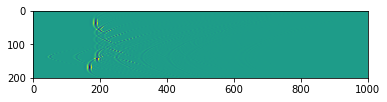

In [9]:
plt.imshow(seis_data)
plt.show()

Что-то невразумительное. Надо [настроить отображение](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.imshow.html): перевернуть картинку, задать палетку и усиление.
Переворачивается матрица c помощью добавления `.T` к её имени.
Наведем красоту: extent задаёт координаты углов изображения, параметр cmap отвечает за [цветовую палетку](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html), vmin и vmax - пределы цветовой шкалы. `aspect`, понятное дело, сжимает изображение по одной из осей.

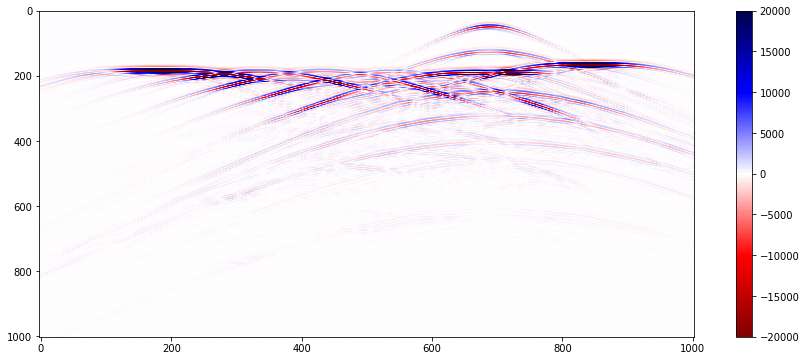

In [10]:
plt.imshow(seis_data.T,aspect=0.5,vmin = -20000, vmax = 20000, cmap = 'seismic_r', interpolation = 'bilinear', extent = [np.min(x_coord)-0.5*dx, np.max(x_coord)+0.5*dx, nt*dt_ms,0])
plt.colorbar()
plt.gcf().set_figheight(6) # увеличиваем высоту картинки
plt.gcf().set_figwidth(15)  # увеличиваем ширину картинки

plt.show()

#### 1.3. Расчет миграции Кирхгофа с постоянной скоростью

Для текущих целей нам необходимо немного модифицировать функцию расчета гипербол `diffraction_curve` из прошлого задания.

В рамках временной миграции не идёт речь о глубинах, поэтому в качестве аргумента функции подадим ей на вход параметр `t0` - вершину гиперболы. Это принципиально ничего не изменит, но избавит нас от необходимости думатть о глубинном масштабе. Таким образом, будем работать во временной области.

Внесите изменения в ту функцию самостоятельно.

In [11]:
def diffraction_curve_t(x0, t0, v, halfwidth, x_step):
    ### BEGIN SOLUTION
    x_hyp = np.arange(x0 - halfwidth, x0 + halfwidth + x_step, x_step)
    t_hyp = np.sqrt(t0**2 + (2*(x_hyp - x0)/v)**2)
    ### END SOLUTION
    return x_hyp, t_hyp


Осталось задать скорость (по традиции, 2000 м/с), апертуру миграции (попробуем максимальную - 500 м) и создать пустой выходной массив. 

In [12]:
v = 2000.0
aperture = 500

output = np.zeros_like(seis_data).astype(float) ## массив нулей того же размера

Теперь в цикле выполняем следующее:
  1. Перебираем все точки выходного изображения
  2. Для каждой точки рассчитываем гиперболу с вершиной в этой точке
  3. Суммируем отсчеты исходного разреза вдоль этой траектории.
    
Считаться может около минуты...

In [13]:
for i in range(1, nx-1):
    for j in range(1,nt-1):
        
        x_h, t_h = diffraction_curve_t(x_coord[i], t_ms[j]*0.001, v, aperture, dx)

        t_hyp = t_h[(t_h > tmin) & (t_h < tmax) & (x_h > xmin) & (x_h < xmax)]
        x_hyp = x_h[(t_h > tmin) & (t_h < tmax) & (x_h > xmin) & (x_h < xmax)]

        weights = np.ones_like(t_hyp) ## весовые коэффициенты. Пока заданы все равными 1
        
        migr_value = 0
        
        if len(x_hyp) > 0:
            for k in range(len(x_hyp)):
                migr_value = migr_value + weights[k]*seis_data[int(x_hyp[k]/dx), int(1000*t_hyp[k]/dt_ms)]


            output[i,j] = migr_value/len(x_hyp)

Обратите внимание на две строчки, отвечающие за то, чтобы расчетные координаты точек гиперболы не вылезали за пределы массива исходных данных.

Что у нас получилось:

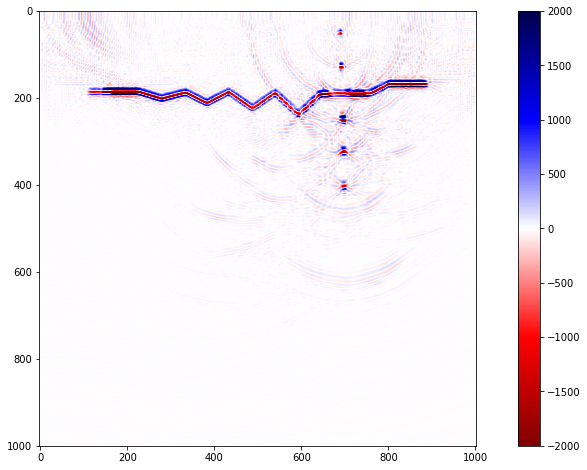

In [14]:
plt.imshow(output.T,aspect=1, vmin = -2e+3, vmax = 2e+3, cmap = 'seismic_r', interpolation = 'bilinear', extent = [np.min(x_coord)-0.5*dx, np.max(x_coord)+0.5*dx, 1000*tmax,0])

plt.colorbar()
plt.gcf().set_figheight(8) # увеличиваем высоту картинки
plt.gcf().set_figwidth(15)  # увеличиваем ширину картинки

plt.show()


#### 1.4. Задачи для самостоятельной работы

##### Задание 1.4.1.
Уменьшить выходное изображение, ограничив его снизу отметкой 500 мс. Изменять исходный немигрированный разрез никак не требуется. Рассчитать миграцию заново. Продемонстрировать результат. Проследить, чтобы оси подписывались корректно.


##### Задание 1.4.2.
Теперь сделать шаг дискретизации выходного изображения по оси времени в два раза больше. Изменять исходный немигрированный разрез никак не требуется. Это должно ещё ускорить расчет. Продемонстрировать результат. Проследить, чтобы оси подписывались корректно.

##### Задание 1.4.3.
Протестировать, как влияет апертура миграции на качество результата и скорость расчета. Подобрать оптимальную апертуру для данного набора данных.

*Ответьте на вопросы*:
1. Какова оптимальная апертура миграции для этого разреза?
2. На что влияет уменьшение апертуры?



<ответ>

##### Задание 1.4.4.
Рассчитать миграцию с иной скоростью: а) на 10% выше истинной. б) на 10% ниже истинной.

*Ответьте на вопрос:*

  - Какие признаки на мигрированном разрезе показывают, что скорость завышена? Занижена?
    

<ответ>

##### Задание 1.4.5.

В процессе миграции учесть весовые коэффициенты. Амплитуды, находящиеся вблизи вершины гиперболы, должны давать больший вклад в сумму, нежели значения по краям.

Иначе говоря, в переменной weights должны содержаться значения, увеличивающиеся к вершине гиперболы и понижающиеся к её краям. Как возможные варианты - отношение `(t_hyp/t0)**-2`, косинусоидальные функции и т.д. Продемонстрировать результат.

*Ответьте на вопрос:*

Как ввод весовой функции повлиял на результат миграции?

<ответ>

##### Задание 1.4.6.

Сделать входной массив данных более редким: оставить а) только каждую 2-ю, б) каждую 4-ю трассы. Рассчитать миграцию по разреженным данным.

*Ответьте на вопрос:*

Как разреживание входных данных влияет на результат?

<ответ>

##### Задание 1.4.7.
Реализовать расчет миграции с помощью распределения амплитуд по изохронам.
Предусмотреть учет апертуры, весовых коэффициентов. 